<a href="https://colab.research.google.com/github/raulc27/python_testes/blob/master/PMFWEEKJANFEV2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install yfinance
!pip install matplotlib==3.1.3
!pip install cvxpy
!pip install pybind11
!pip install riskfolio-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 78.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
riskfolio-lib 4.0.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wh

In [1]:
# importacao das bibliotecas
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import riskfolio as rp
#import riskfolio.Portfolio as pf
warnings.filterwarnings('ignore')

In [2]:
#In sample

# periodo
inicio = '2016-01-01'
fim = '2022-08-30'

#Seleção dos ativos da carteira
ativos = ['PETR4.SA','VALE3.SA','BBDC4.SA','ITSA4.SA','ABEV3.SA','WEGE3.SA','IVVB11.SA']

#peSO da carteira anteriormente

peso_in = np.array([0.15,0.15,0.15,0.15,0.15,0.15,0.15])
peso_in

array([0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15])

In [3]:
#download dos dados
carteira = yf.download(ativos, start=inicio, end=fim)['Adj Close']
carteira.head()

[*********************100%***********************]  7 of 7 completed


,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2016-01-04 00:00:00-02:00,13.508918,6.395191,3.078628,83.110001,3.027317,8.419854,5.020993
2016-01-05 00:00:00-02:00,13.720855,6.418428,3.129938,83.000000,2.943592,8.307058,5.264499
2016-01-06 00:00:00-02:00,13.587411,6.327463,3.157925,82.099998,2.820208,7.696635,5.144461
2016-01-07 00:00:00-02:00,13.226338,6.199430,3.111277,81.000000,2.758516,7.238818,4.996987
2016-01-08 00:00:00-02:00,13.399026,6.078139,3.111277,80.000000,2.762923,6.993322,4.972979


In [4]:
#Extração dos parâmetros

#Retornos
retorno_carteira = carteira.pct_change().dropna()

#Covariancia
cov_in = retorno_carteira.cov()

In [5]:
cov_in

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
ABEV3.SA,0.000321,0.000194,0.000167,0.000016,0.000209,0.000111,0.000157
BBDC4.SA,0.000194,0.000534,0.000380,0.000043,0.000448,0.000254,0.000189
ITSA4.SA,0.000167,0.000380,0.000375,0.000038,0.000361,0.000191,0.000177
IVVB11.SA,0.000016,0.000043,0.000038,0.000881,0.000063,0.000066,0.000024
PETR4.SA,0.000209,0.000448,0.000361,0.000063,0.000975,0.000423,0.000254
VALE3.SA,0.000111,0.000254,0.000191,0.000066,0.000423,0.000828,0.000156
WEGE3.SA,0.000157,0.000189,0.000177,0.000024,0.000254,0.000156,0.000517


In [6]:
pesos_in = pd.DataFrame(data={'peso_in':peso_in}, index=ativos)
pesos_in

,peso_in
PETR4.SA,0.15
VALE3.SA,0.15
BBDC4.SA,0.15
ITSA4.SA,0.15
ABEV3.SA,0.15
WEGE3.SA,0.15
IVVB11.SA,0.15


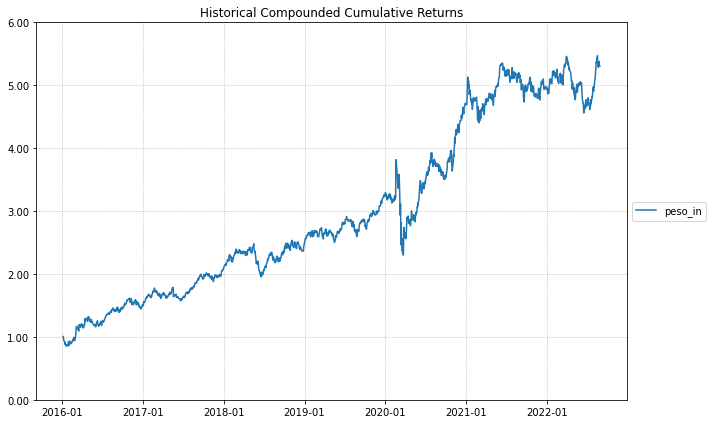

In [7]:
ax = rp.plot_series(returns=retorno_carteira, w=pesos_in, cmap='tab20', height=6, width=10, ax=None)

In [8]:
#parametros out-of-sample
out_inicio = '2022-09-01'
out_fim = '2023-01-20'

#download dos dados
carteira_out = yf.download(ativos, start=out_inicio, end=out_fim)['Adj Close']

#Calcular o retorno
retorno_out = carteira_out.pct_change().dropna()

#Matriz covariância
cov_out = retorno_out.cov()

[*********************100%***********************]  7 of 7 completed


In [9]:
retorno_out

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2022-09-02 00:00:00-03:00,0.003240,0.010940,0.015284,-0.021020,-0.012703,-0.015182,0.064482
2022-09-05 00:00:00-03:00,0.004522,0.002072,0.011828,-0.002460,-0.002394,0.036554,0.022840
2022-09-06 00:00:00-03:00,0.000643,-0.006202,-0.017003,0.008969,-0.037193,-0.023766,-0.019741
2022-09-08 00:00:00-03:00,-0.003856,-0.005720,0.002162,0.020000,-0.009346,0.013193,-0.002641
2022-09-09 00:00:00-03:00,0.014194,0.013598,0.006473,0.003050,-0.000314,0.078127,0.007944
...,...,...,...,...,...,...,...
2023-01-13 00:00:00-03:00,-0.015603,-0.003324,-0.008046,0.002676,-0.002436,0.000853,0.011945
2023-01-16 00:00:00-03:00,-0.048991,-0.030687,-0.017381,0.014009,-0.021571,-0.016734,-0.032846
2023-01-17 00:00:00-03:00,0.050000,0.006882,0.015330,-0.013158,0.061564,-0.001301,0.016450


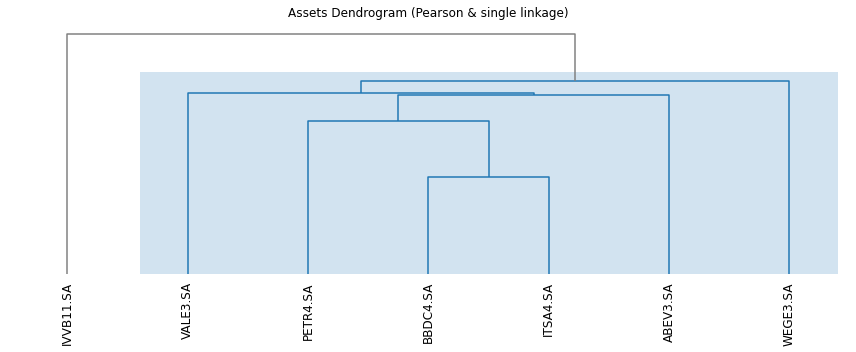

In [13]:
#Plotando Clusters

ax = rp.plot_dendrogram(returns=retorno_carteira,
                            codependence='pearson',
                            linkage='single',
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            ax=None)